In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/df_after_one_hot_encoding.csv')
df.head()

,total_sqft,bath,price,BHK,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,4615.384615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**There are several observations made in the real estate world:**
- Sqft per BHK in Bangalore is atleast 225.
- There are atmost BHK + 1 bathrooms present in a house.
- Mainly there are 2 and 3 BHK homes.
- Assuming normal distribution of the column - "price_per_sqft" - we would remove outlier.
- We can also remove the houses on comparison according to the BHK. We can ignore the 3BHK house with lesser price on compared with 2BHK.Similarly 2BHK and 1 BHK in same places.

In [10]:
df = df[((df['total_sqft'] / (df['BHK'])) >= 225) & ~(df['BHK'] == 0)]

In [12]:
df.shape

(12703, 245)

In [20]:
df = df[df['bath'] <= (df['BHK'] + 1)]

In [23]:
df.shape

(12543, 245)

In [42]:
bhk_counts = df['BHK'].value_counts()

In [44]:
bhk_filtered = bhk_counts[bhk_counts > 100]

In [45]:
bhk_values = bhk_filtered.index

In [46]:
bhk_list = bhk_values.tolist()

In [47]:
bhk_list

[2, 3, 4, 1, 5, 6]

In [53]:
df = df[df['BHK'].isin(bhk_list)]

In [54]:
df.sample(10)

,total_sqft,bath,price,BHK,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1129,1985.0,3.0,75.00,3,3778.337531,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11389,1100.0,2.0,72.00,3,6545.454545,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1183,1945.0,3.0,97.42,3,5008.740360,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11941,1755.0,3.0,117.00,3,6666.666667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2106,2000.0,4.0,139.00,4,6950.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9756,1060.0,2.0,34.00,2,3207.547170,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13047,1850.0,3.0,98.00,3,5297.297297,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4164,1500.0,3.0,100.00,3,6666.666667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13122,1651.0,3.0,49.53,3,3000.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9599,1830.0,4.0,150.00,3,8196.721311,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


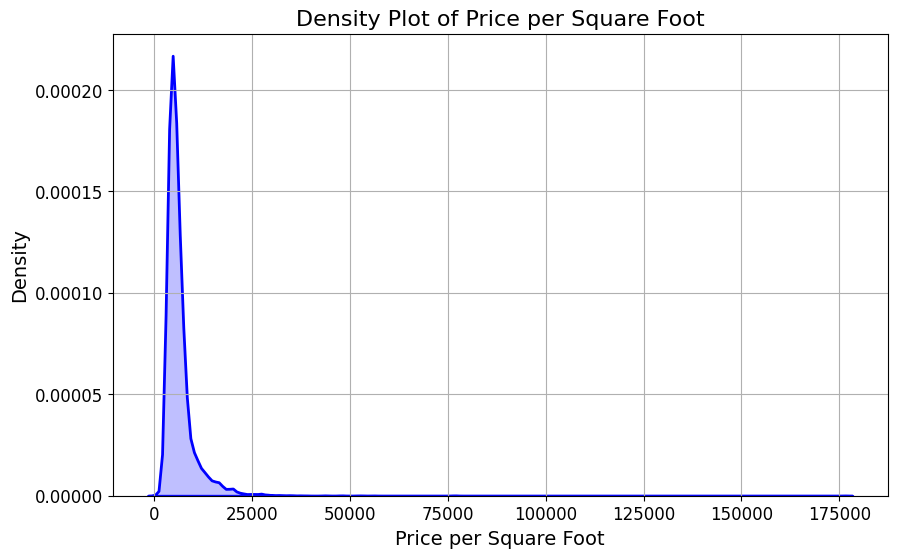

In [59]:
plt.figure(figsize=(10, 6))
kde_plot = sns.kdeplot(data=df, x='price_per_sqft', color='blue', fill=True, linewidth=2)

plt.title('Density Plot of Price per Square Foot', fontsize=16)
plt.xlabel('Price per Square Foot', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)

plt.show()

In [60]:
df['price_per_sqft'].describe()

count     12441.000000
mean       6334.661328
std        4140.173483
min         267.829813
25%        4211.469534
50%        5300.000000
75%        6956.136464
max      176470.588235
Name: price_per_sqft, dtype: float64

In [61]:
import statsmodels.api as sm

<Figure size 1000x600 with 0 Axes>

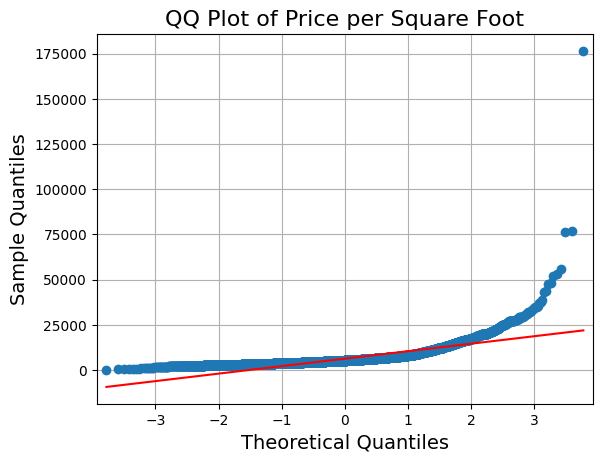

In [63]:
plt.figure(figsize=(10, 6))
qq_plot = sm.qqplot(df['price_per_sqft'], line='s')

plt.title('QQ Plot of Price per Square Foot', fontsize=16)
plt.xlabel('Theoretical Quantiles', fontsize=14)
plt.ylabel('Sample Quantiles', fontsize=14)
plt.grid(True)

plt.show()

**The KDE Plot shows that the data is right-skewed.**

**The QQ Normal Plot shows that the data is normally distributed but is right skewed.**

**There are 2 ways in tackling these outliers :**
- Outliers based on interquartile range.
- Keep data with the range of mean + standard deviation.
- We have used the first method.

In [64]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

In [65]:
IQR = Q3 - Q1

In [66]:
print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("Interquartile Range (IQR):", IQR)

Q1 (25th percentile): 4211.469534050179
Q3 (75th percentile): 6956.136464333185
Interquartile Range (IQR): 2744.666930283006


In [68]:
(df['price_per_sqft'] < (Q1 - 1.5 * IQR)).sum()

0

In [69]:
(df['price_per_sqft'] > (Q3 + 1.5 * IQR)).sum()

1019

In [74]:
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

In [75]:
mean,std

(6334.661327813622, 4140.173482536829)

In [77]:
(df['price_per_sqft'] > (mean + std)).sum()

1166

In [78]:
(df['price_per_sqft'] < (mean - std)).sum()

44

In [89]:
df = df[~((df['price_per_sqft'] < (Q1 - 1.5 * IQR)) | (df['price_per_sqft'] > (Q3 + 1.5 * IQR)))]

In [90]:
df.shape

(11422, 245)

In [92]:
df.head()

,total_sqft,bath,price,BHK,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4,4615.384615,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
